In [349]:
import numpy as np
alph = 0.3
beta = 0.2
Tr = np.array([[1,0],[0,1]]) 
# transition probabilistic
O = np.array([[1-alph,alph],[alph,1-alph]])

In [350]:
# transition 
obser = range(2)
update = lambda o, b : np.diag(O[o]).dot(Tr).dot(np.array([[b],[1-b]]))
obs = lambda o, b : np.sum(update(o,b))
def nex(o,b):
    return  (update(o, b)*obs(o,b)**-1)[0,0].tolist()
print(update(1,0))
print(obs(1,0))
print(nex(1,0))

[[ 0. ]
 [ 0.7]]
0.7
0.0


In [351]:
# define set
def K(b):
    #print('K(%f)' %(nex(0,[[b],[1-b]])) )
    return float(((b<beta)|(1-b<beta)))
    

In [352]:

def init(b):
    return 0

def value_f(b,depth):
    if depth == 0:
        return K(b)
    else:
        return K(b)+(1-K(b))*sum(map(lambda o: value_f(nex(o,b),depth-1)*obs(o,b),obser))
    

In [389]:

# plot value iteratons of different depth 
# (plot in next window)
import matplotlib.pyplot as plt
value_f(0,0)
for it in range(3):
    b= np.arange(0,1,0.001)


    plt.plot(b,list(map(lambda b: value_f(b,it),b)),label = "iter %d" %it )
    print("-----")


    
    



-----
-----


-----


In [395]:
# compute turing  points

def rec_crit(c):
    if isinstance(c, list):
        out = []
        for cv in c:
            out += [*rec_crit(cv)]
        return out

    out = []
    obs0 = c*alph*(1-alph-c+2*c*alph)**-1
    obs1 = c*(1-alph)*(c-2*c*alph+alph)**-1
    if (obs0 <1-beta)&(beta<obs0) :
        out+=[obs0]
    if (obs1 <1-beta)&(beta<obs1) :
        out+=[obs1]
    return out


crit = {beta,1-beta}
for i in range(2):
    crit |= set(rec_crit(list(crit)))
    
turn = sorted(list(crit)) 
print(sorted(list(crit)))
plt.plot(list(crit), [1]*len(crit),linestyle='None', marker =".")


slope0 = lambda b: alph + (1-2*alph)*b
slope1 = lambda b: (1-alph) - (1-2*alph)*b

#v = np.where(b < turn[0],1,np.where(b < turn[1],slope1(b),np.where(b < turn[2],0, np.where(b < turn[3],slope0(b),1))))
#plt.plot(b,v)
plt.legend()
slope1(turn[1])

[0.2, 0.3684210526315789, 0.423529411764706, 0.5764705882352941, 0.6315789473684211, 0.7999999999999999, 0.8]


/anaconda/envs/Python36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


0.5526315789473684

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


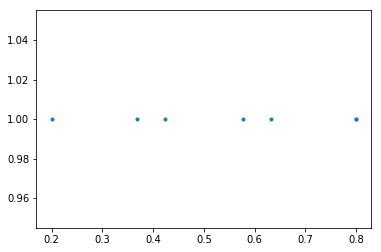

In [396]:
from matplotlib2tikz import save as tikz_save


tikz_save(
    'mytikzv0.tex',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth'
    )

plt.show()